In [23]:
#importing necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
#import data from csv file 
Data=pd.read_csv('Melbourne_housing_FULL.csv')
Data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [38]:
Data.shape

(34857, 21)

In [39]:
Data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [40]:
# Analysing all categorical and numerical data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

From above, we can see that there are so many Missing values. We can observe the categorical (object) and numerical columns seperately.

In [41]:
# Analysing Numerical data only
Data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


# Dealing with Missing Values

In [42]:
#Counts of missing Values in each columns
Data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [43]:
# Percentage of Missings in each columns
Data.isnull().sum()/len(Data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [44]:
# Getting list of columns with missing values 
cols_with_missing = [col for col in Data.columns 
                    if Data[col].isnull().any()
                    ]
cols_with_missing

['Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [45]:
# Dropping Clounms with missing values
# reduced_Data = Data.drop(cols_with_missing, axis=1)

# Dropping Rows with missing values
# reduced_Data = Data.drop(cols_with_missing, axis=0)

Unless most values in the dropped columns are missing, the model loses access to a lot of (potentially useful!) information with this approach. So, I'm not going to drop any columns or any rows as it can make worse to my model's accuracy.

On other hand, Imputation fills in the missing values with some number. For instance, we can fill in the mean value along each column.

# Removing Missing Values

In [46]:
from sklearn.impute import SimpleImputer
Data_imputer = SimpleImputer(strategy='most_frequent')

In [47]:
imputed_Data = pd.DataFrame(Data_imputer.fit_transform(Data))

In [48]:
# Imputation renoved column names so puting them back
imputed_Data.columns = Data.columns

In [49]:
# Checking for missing values in the Data.
imputed_Data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [50]:
imputed_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Suburb         34857 non-null  object
 1   Address        34857 non-null  object
 2   Rooms          34857 non-null  object
 3   Type           34857 non-null  object
 4   Price          34857 non-null  object
 5   Method         34857 non-null  object
 6   SellerG        34857 non-null  object
 7   Date           34857 non-null  object
 8   Distance       34857 non-null  object
 9   Postcode       34857 non-null  object
 10  Bedroom2       34857 non-null  object
 11  Bathroom       34857 non-null  object
 12  Car            34857 non-null  object
 13  Landsize       34857 non-null  object
 14  BuildingArea   34857 non-null  object
 15  YearBuilt      34857 non-null  object
 16  CouncilArea    34857 non-null  object
 17  Lattitude      34857 non-null  object
 18  Longtitude     34857 non-n

In [51]:
# As we can see above all columns is of object type, so befor moving ahead i should fix it.
# Next line of code will help to get all columns so that we can classify the dtype of columns 

pd.set_option('max_columns', None)
imputed_Data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000,SS,Jellis,3/09/2016,2.5,3067,2,1,1,126,120,1970,Yarra City Council,-37.8014,144.996,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1.48e+06,S,Biggin,3/12/2016,2.5,3067,2,1,1,202,120,1970,Yarra City Council,-37.7996,144.998,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1.035e+06,S,Biggin,4/02/2016,2.5,3067,2,1,0,156,79,1900,Yarra City Council,-37.8079,144.993,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,600000,VB,Rounds,4/02/2016,2.5,3067,3,2,1,0,120,1970,Yarra City Council,-37.8114,145.012,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1.465e+06,SP,Biggin,4/03/2017,2.5,3067,3,2,0,134,150,1900,Yarra City Council,-37.8093,144.994,Northern Metropolitan,4019


In [52]:
# Converting the dtypes of columns into right dtypes
#Converting into Categorical dtypes
cat_col = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']
for colname in cat_col:
    imputed_Data[colname] = imputed_Data[colname].astype('object') 

#Converting into Numerical dtypes
int_col = ['Rooms', 'Price', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
           'YearBuilt', 'Propertycount']
flt_col = ['Distance', 'Lattitude', 'Longtitude']
for colname in int_col:
    imputed_Data[colname] = imputed_Data[colname].astype('int64')
for colname in flt_col:
    imputed_Data[colname] = imputed_Data[colname].astype('float64')   

# Converting to date object
imputed_Data['Date'] = pd.to_datetime(imputed_Data['Date'])

In [53]:
# Rechecking the dtypes
imputed_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          34857 non-null  int64         
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34857 non-null  float64       
 9   Postcode       34857 non-null  int64         
 10  Bedroom2       34857 non-null  int64         
 11  Bathroom       34857 non-null  int64         
 12  Car            34857 non-null  int64         
 13  Landsize       34857 non-null  int64         
 14  BuildingArea   34857 non-null  int64         
 15  YearBuilt      3485

As we are done with Missing values and dtypes so we can move next which is Outliers
For this I'm going to use Univariate and Bivariate analysis.

# Removing Outliers

Univariate Analysis¶

In [54]:
pd.set_option('display.max_columns', None)
imputed_Data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000,SS,Jellis,2016-03-09,2.5,3067,2,1,1,126,120,1970,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,2,1,1,202,120,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,2,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,600000,VB,Rounds,2016-04-02,2.5,3067,3,2,1,0,120,1970,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067,3,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019


In [55]:
num_col = imputed_Data.select_dtypes(exclude=['object', 'datetime64[ns]'])
num_col

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,600000,2.5,3067,2,1,1,126,120,1970,-37.80140,144.99580,4019
1,2,1480000,2.5,3067,2,1,1,202,120,1970,-37.79960,144.99840,4019
2,2,1035000,2.5,3067,2,1,0,156,79,1900,-37.80790,144.99340,4019
3,3,600000,2.5,3067,3,2,1,0,120,1970,-37.81140,145.01160,4019
4,3,1465000,2.5,3067,3,2,0,134,150,1900,-37.80930,144.99440,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000,6.3,3013,4,1,3,593,120,1970,-37.81053,144.88467,6543
34853,2,888000,6.3,3013,2,2,1,98,104,2018,-37.81551,144.88826,6543
34854,2,705000,6.3,3013,2,1,2,220,120,2000,-37.82286,144.87856,6543
34855,3,1140000,6.3,3013,3,1,2,0,120,1970,-37.83610,144.99660,6543


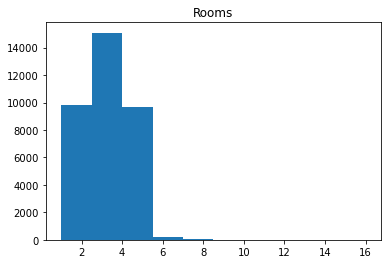

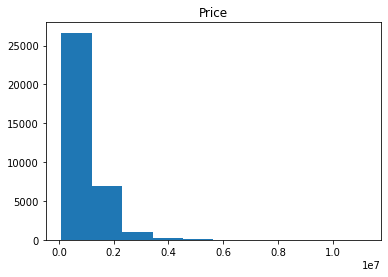

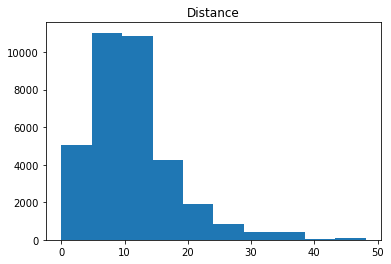

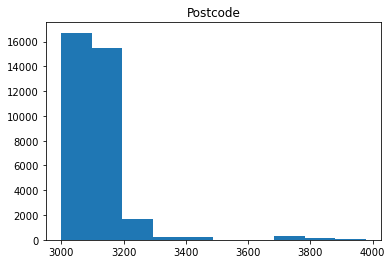

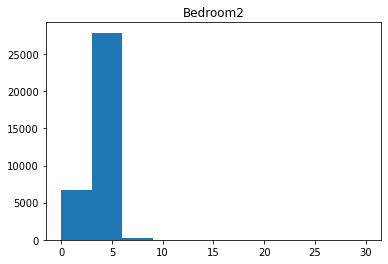

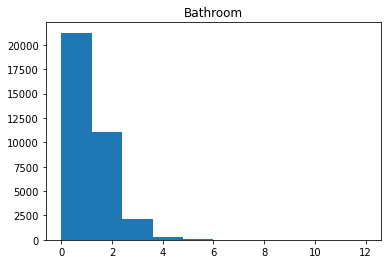

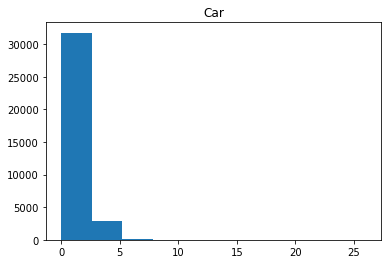

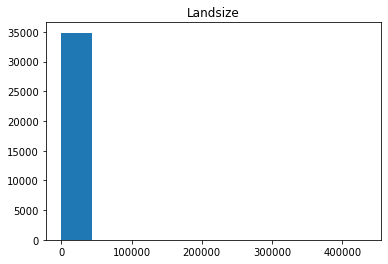

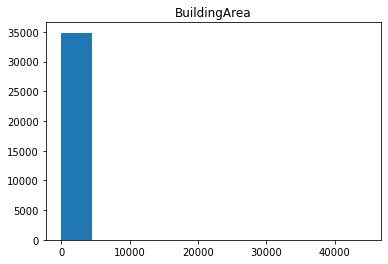

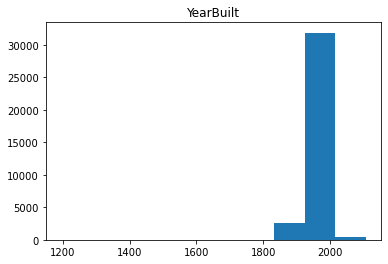

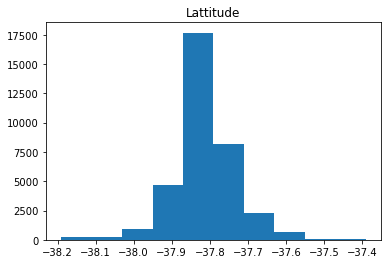

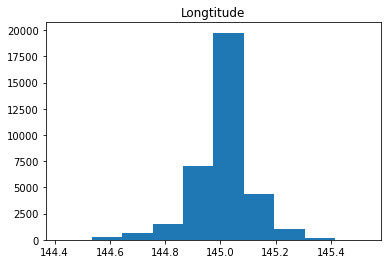

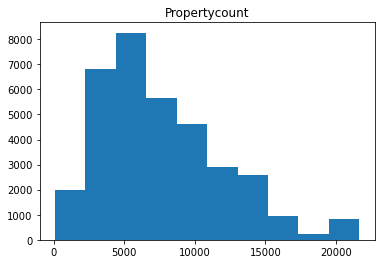

In [56]:
# Ploting Box Plot for each numerical columns
import matplotlib.pyplot as plt
for i in num_col:
    plt.hist(num_col[i])
    plt.title(i)
    plt.show()

In [57]:
# Defining a function to get the Ranges
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)
print('The Range of Number of Room ',minmax(imputed_Data['Rooms']))
print('The Range of Price ',minmax(imputed_Data['Price']))
print('The Range of Distance ',minmax(imputed_Data['Distance']))
print('The Range of Landsize ',minmax(imputed_Data['Landsize']))
print('The Range of YearBuilt ',minmax(imputed_Data['YearBuilt']))

The Range of Number of Room  (1, 16)
The Range of Price  (85000, 11200000)
The Range of Distance  (0.0, 48.1)
The Range of Landsize  (0, 433014)
The Range of YearBuilt  (1196, 2106)


In [58]:
# Getting entries for building having more than 4 and 10 rooms
imputed_Data[imputed_Data['Rooms']>4].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
76,Airport West,33 Bowes Av,5,h,1035000,S,Airport,2016-06-08,13.5,3042,3,1,2,0,120,1970,Moonee Valley City Council,-37.8361,144.9966,Western Metropolitan,3464
81,Airport West,11 Harrington Rd,6,h,725000,SP,Barry,2016-07-05,13.5,3042,6,3,2,976,186,1980,Moonee Valley City Council,-37.7239,144.8735,Western Metropolitan,3464
96,Airport West,241 Parer Rd,5,h,755000,PI,Propertyau,2016-05-14,13.5,3042,3,2,2,596,120,1970,Moonee Valley City Council,-37.7248,144.8699,Western Metropolitan,3464
153,Albert Park,23 Finlay St,5,h,2100000,S,Greg,2016-10-12,3.3,3206,5,2,1,237,120,1970,Port Phillip City Council,-37.8436,144.9557,Southern Metropolitan,3280
175,Albert Park,143 Kerferd Rd,7,h,600000,SN,hockingstuart,2016-09-24,3.3,3206,7,7,0,435,120,1970,Port Phillip City Council,-37.8473,144.9539,Southern Metropolitan,3280


In [59]:
pd.set_option('display.max_columns', None)
imputed_Data[imputed_Data['Rooms']>10].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8309,Preston,12 Lyonsville Av,12,h,600000,SN,Barry,2016-08-28,8.8,3072,3,1,2,0,120,1970,Darebin City Council,-37.83610,144.99660,Northern Metropolitan,14577
12959,Hawthorn,10 Berkeley St,12,h,4700000,PI,Property,2017-05-20,4.6,3122,3,1,2,0,120,1970,Boroondara City Council,-37.83030,145.03670,Southern Metropolitan,11308
26210,Mitcham,20 Harrison St,16,h,5000000,S,Buxton,2017-10-28,17.2,3132,16,8,8,0,120,1970,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871
27150,Melton,213 Station Rd,12,h,710000,S,PRDNationwide,2017-11-11,31.7,3337,12,5,3,960,223,1970,Melton City Council,-37.68830,144.57760,Western Victoria,3600


In [60]:
# As we can see from previous two cells, its not possible to build more than 6 rooms within 120Sq.Mtr (~1200Sq.Mtr).
# So it might be wrong entry. Hence we can drop those entries (Rows) as its only few Rows (Entries).
cleaned_Data_R = imputed_Data[imputed_Data['Rooms']<=8]

In [61]:
cleaned_Data_R.shape

(34843, 21)

In [62]:
# Now we are left with entries with only less than 8 rooms
print('The Range of Number of Room ',minmax(cleaned_Data_R['Rooms']))


The Range of Number of Room  (1, 8)


Similarly in case of 'Price' columns, we can see that Prices is fluctuating so much for Number of Rooms. Some time 3 & 4 Room's cost is almost eqal to 2 Room's Prices.

In [63]:
# Analysing Bathroom
print('The Range of Bathroom ',minmax(imputed_Data['Bathroom']))
print(imputed_Data[imputed_Data['Bathroom']==0].shape)
imputed_Data[imputed_Data['Bathroom']==0]

The Range of Bathroom  (0, 12)
(46, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
228,Alphington,6 Naroon Rd,3,h,1485000,SP,McGrath,2016-08-28,6.4,3078,3,0,0,597,120,1970,Darebin City Council,-37.77810,145.02840,Northern Metropolitan,2211
481,Armadale,3/50 Denbigh Rd,2,u,546000,SP,hockingstuart,2016-07-30,6.3,3143,2,0,0,0,120,1970,Stonnington City Council,-37.85680,145.01610,Southern Metropolitan,4836
845,Balaclava,5/11 Albion St,2,u,497500,PI,hockingstuart,2016-08-28,6.6,3183,2,0,0,0,120,1970,Port Phillip City Council,-37.87390,144.99290,Southern Metropolitan,2952
1009,Balwyn,5 Shrimpton Ct,2,h,1010000,PI,Marshall,2016-07-30,9.7,3103,2,0,0,1611,120,1970,Boroondara City Council,-37.80920,145.10160,Southern Metropolitan,5682
1549,Bentleigh East,579 Warrigal Rd,3,h,700000,S,Thomson,2016-05-22,13.9,3165,0,0,0,456,120,1970,Glen Eira City Council,-37.93140,145.08080,Southern Metropolitan,10969
1772,Brighton,17 New St,3,h,1900000,S,Marshall,2016-06-08,11.2,3186,3,0,0,0,120,1970,Bayside City Council,-37.93010,144.99350,Southern Metropolitan,10579
1784,Brighton,1/5 Webb St,3,t,1067000,S,Kay,2016-07-05,11.2,3186,3,0,1,0,120,1970,Bayside City Council,-37.91190,144.98710,Southern Metropolitan,10579
2716,Camberwell,5 Nicholsdale Rd,4,h,1400000,PI,Jellis,2016-04-16,7.8,3124,3,0,0,693,120,1935,Boroondara City Council,-37.83600,145.09140,Southern Metropolitan,8920
2853,Canterbury,5/25 Chatham Rd,3,h,600000,SP,Jellis,2016-04-23,9.0,3126,3,0,0,502,120,1970,Boroondara City Council,-37.82140,145.08580,Southern Metropolitan,3265
3717,Eaglemont,3/43 Waldemar Rd,3,t,600000,SN,Miles,2016-08-10,10.3,3084,0,0,0,0,120,1970,Banyule City Council,-37.75940,145.05420,Eastern Metropolitan,1651


In [64]:
# Previous cell shows that 46 houses does not have Bathroom but the Price of that rooms is high.
# So we can drop that too
cleaned_Data_R_B = cleaned_Data_R[cleaned_Data_R['Bathroom']>0]

In [65]:
cleaned_Data_R_B.shape

(34797, 21)

In [66]:
# Again, Building Area cannot be 0, if it is, then Price for that Building cannot be in thousands of Australian dollars
# So just remove it
cleaned_Data_R_B_A = cleaned_Data_R_B[cleaned_Data_R_B['BuildingArea']>0]

In [67]:
print('The Range of Landsize ',minmax(cleaned_Data_R_B_A['Landsize']))
print(cleaned_Data_R_B_A[cleaned_Data_R_B_A['Landsize']<=50].shape)
cleaned_Data_R_B_A[cleaned_Data_R_B_A['Landsize']<50]

The Range of Landsize  (0, 433014)
(14232, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3,Abbotsford,18/659 Victoria St,3,u,600000,VB,Rounds,2016-04-02,2.5,3067,3,2,1,0,120,1970,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
15,Abbotsford,217 Langridge St,3,h,1000000,S,Jellis,2016-08-10,2.5,3067,3,1,2,0,120,1970,Yarra City Council,-37.8361,144.9966,Northern Metropolitan,4019
16,Abbotsford,18a Mollison St,2,t,745000,S,Jellis,2016-08-10,2.5,3067,3,1,2,0,120,1970,Yarra City Council,-37.8361,144.9966,Northern Metropolitan,4019
17,Abbotsford,6/241 Nicholson St,1,u,300000,S,Biggin,2016-08-10,2.5,3067,1,1,1,0,120,1970,Yarra City Council,-37.8008,144.9973,Northern Metropolitan,4019
19,Abbotsford,403/609 Victoria St,2,u,542000,S,Dingle,2016-08-10,2.5,3067,3,1,2,0,120,1970,Yarra City Council,-37.8361,144.9966,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34838,Williamstown,11/81 Melbourne Rd,2,u,450000,SP,Raine,2018-02-24,6.8,3016,3,1,2,0,120,1970,Hobsons Bay City Council,-37.8361,144.9966,Western Metropolitan,6380
34839,Williamstown,24/18 Station Rd,2,u,475000,SP,Greg,2018-02-24,6.8,3016,3,1,2,0,120,1970,Hobsons Bay City Council,-37.8361,144.9966,Western Metropolitan,6380
34840,Williamstown,3/2 Thompson St,2,u,520000,VB,Raine,2018-02-24,6.8,3016,3,1,2,0,120,1970,Hobsons Bay City Council,-37.8361,144.9966,Western Metropolitan,6380
34844,Windsor,4/16 Lewisham Rd,1,u,440000,SP,Biggin,2018-02-24,4.6,3181,3,1,2,0,120,1970,Port Phillip City Council,-37.8361,144.9966,Southern Metropolitan,4380


In [68]:
# Analysing BuildingArea
print('The Range of BuildingArea ',minmax(imputed_Data['BuildingArea']))
print('Shape of BbildingArea is ',cleaned_Data_R_B[cleaned_Data_R_B['BuildingArea']==0].shape)
cleaned_Data_R_B[cleaned_Data_R_B['BuildingArea']==0]

The Range of BuildingArea  (0, 44515)
Shape of BbildingArea is  (77, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7211,North Melbourne,19 Shands La,2,t,841000,S,Jellis,2017-04-03,2.3,3051,2,1,1,215,0,2000,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821
16540,South Melbourne,148 Cobden St,3,h,600000,S,Marshall,2017-06-24,1.9,3205,3,2,0,282,0,1920,Port Phillip City Council,-37.83658,144.96292,Southern Metropolitan,5943
19775,Balwyn North,14 Wanbrow Av,5,h,1950000,S,RT,2017-03-09,9.7,3104,5,3,2,743,0,1949,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809
19840,Bundoora,22 Moreton Cr,3,h,814000,S,Barry,2017-03-09,12.1,3083,3,1,2,542,0,1970,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175
20038,Heidelberg Heights,8 Thames St,3,h,600000,SN,Miles,2017-03-09,8.8,3081,3,1,2,658,0,1920,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32936,Wollert,42 Rhone Dr,4,h,722500,S,LJH,2018-02-17,25.5,3750,4,2,2,512,0,1970,Whittlesea City Council,-37.61971,145.02910,Northern Metropolitan,2940
33397,Greenvale,26 Perugia Av,4,h,677000,S,Ray,2018-03-17,20.4,3059,4,2,2,312,0,2013,Hume City Council,-37.62439,144.88629,Northern Metropolitan,4864
33660,Preston,91 Dundas St,3,h,950000,PI,Spencer,2018-03-17,8.4,3072,3,1,2,301,0,1935,Darebin City Council,-37.75302,145.00948,Northern Metropolitan,14577
33899,Wollert,40 Whitebark St,4,h,615000,S,HAR,2018-03-17,25.5,3750,4,2,2,392,0,2015,Whittlesea City Council,-37.61252,145.04288,Northern Metropolitan,2940


In [69]:
cleaned_Data_R_B_A

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000,SS,Jellis,2016-03-09,2.5,3067,2,1,1,126,120,1970,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,2,1,1,202,120,1970,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,2,1,0,156,79,1900,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,600000,VB,Rounds,2016-04-02,2.5,3067,3,2,1,0,120,1970,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067,3,2,0,134,150,1900,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000,PI,Jas,2018-02-24,6.3,3013,4,1,3,593,120,1970,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543
34853,Yarraville,29A Murray St,2,h,888000,SP,Sweeney,2018-02-24,6.3,3013,2,2,1,98,104,2018,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543
34854,Yarraville,147A Severn St,2,t,705000,S,Jas,2018-02-24,6.3,3013,2,1,2,220,120,2000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543
34855,Yarraville,12/37 Stephen St,3,h,1140000,SP,hockingstuart,2018-02-24,6.3,3013,3,1,2,0,120,1970,Maribyrnong City Council,-37.83610,144.99660,Western Metropolitan,6543


In [70]:
# Now try to find is there any which not justify with BuildingArea
cleaned_Data_R_B_A[cleaned_Data_R_B_A['BuildingArea']<50]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
41,Abbotsford,138/56 Nicholson St,3,u,1090000,S,Jellis,2017-03-18,2.5,3067,3,2,2,4290,27,1970,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019
55,Abbotsford,166 Gipps St,3,h,1290000,S,Biggin,2017-02-25,2.5,3067,3,2,2,147,18,1970,Yarra City Council,-37.80500,144.99430,Northern Metropolitan,4019
177,Albert Park,13/52 Moubray St,1,u,442500,S,Marshall,2017-02-25,3.3,3206,1,1,0,0,34,1970,Port Phillip City Council,-37.84210,144.95170,Southern Metropolitan,3280
242,Altona,173 Queen St,3,h,1335000,S,hockingstuart,2016-08-10,13.8,3018,3,1,4,777,22,1953,Hobsons Bay City Council,-37.86970,144.82490,Western Metropolitan,5301
278,Altona,5/57 Blyth St,3,u,730000,SP,Barlow,2016-05-28,13.8,3018,3,2,1,70,3,2014,Hobsons Bay City Council,-37.86800,144.82850,Western Metropolitan,5301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32893,Taylors Lakes,3 Lynne Ct,4,h,791000,S,Reliance,2018-02-17,15.5,3038,4,2,2,750,30,1970,Brimbank City Council,-37.70316,144.78168,Western Metropolitan,5336
33346,Footscray,50 Everard St,2,t,620000,S,Jas,2018-03-17,5.1,3011,2,1,0,104,2,1970,Maribyrnong City Council,-37.79656,144.88523,Western Metropolitan,7570
33358,Gladstone Park,9 Farley Ct,3,h,700000,S,Ray,2018-03-17,12.9,3043,3,2,1,591,19,1970,Hume City Council,-37.68479,144.89602,Western Metropolitan,3285
33479,Kings Park,19 Aldergate Cr,3,h,585000,SP,Frank,2018-03-17,14.0,3021,3,1,4,706,18,1985,Brimbank City Council,-37.74012,144.77180,Western Metropolitan,2878


In [71]:
# Its not Possible to cunstruct 3 rooms in 3 Sq.Mtr Area.....And so on
# So I'm going to move forward with Area more than 50Sq.Mtr only
cleaned_Data_R_B_BA = cleaned_Data_R_B_A[cleaned_Data_R_B_A['BuildingArea']>50]

In [72]:
# Analysing Landsize
print('The Range of Landsize ',minmax(imputed_Data['Landsize']))
print('The Range of BuildingArea ',minmax(imputed_Data['BuildingArea']))

cleaned_Data_R_B_BA[['Landsize','BuildingArea', 'Price','Rooms']].head(20)

The Range of Landsize  (0, 433014)
The Range of BuildingArea  (0, 44515)


,Landsize,BuildingArea,Price,Rooms
0,126,120,600000,2
1,202,120,1480000,2
2,156,79,1035000,2
3,0,120,600000,3
4,134,150,1465000,3
5,94,120,850000,3
6,120,142,1600000,4
7,400,220,600000,4
8,201,120,600000,2
9,202,120,600000,2


In [73]:
# As we can see in previous cell The Range of Landsize has a wide range (0, 433014). 
#So I'm trying to get only genuine size of land for the BuildingArea

cleaned_Data_R_B_BA_L = cleaned_Data_R_B_BA[cleaned_Data_R_B_BA['Landsize']>50]
cleaned_Data_R_B_BA_L.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000,SS,Jellis,2016-03-09,2.5,3067,2,1,1,126,120,1970,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,2,1,1,202,120,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,2,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067,3,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,3067,3,2,1,94,120,1970,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019


In [74]:
# Still data has something which is not acceptable, for instance index 5 has Landsize=94 and BuildingArea is 120 which seems impossible.
# Hence, selecting only those data which has Landsize more than or equal to BuildingArea

cleaned_Data_R_B_BA_LS = cleaned_Data_R_B_BA[cleaned_Data_R_B_BA['Landsize'] >= cleaned_Data_R_B_BA['BuildingArea']]
print(cleaned_Data_R_B_BA_LS.shape)
cleaned_Data_R_B_BA_LS.head()

(19567, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000,SS,Jellis,2016-03-09,2.5,3067,2,1,1,126,120,1970,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,2,1,1,202,120,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,2,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,600000,SN,Nelson,2016-06-08,2.5,3067,3,2,2,400,220,2006,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
8,Abbotsford,53 Turner St,2,h,600000,S,Biggin,2016-06-08,2.5,3067,4,1,2,201,120,1900,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019


In [75]:
# Now I thing we have almost a good Data to move further 
cleaned_Data_R_B_BA_LS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19567 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         19567 non-null  object        
 1   Address        19567 non-null  object        
 2   Rooms          19567 non-null  int64         
 3   Type           19567 non-null  object        
 4   Price          19567 non-null  int64         
 5   Method         19567 non-null  object        
 6   SellerG        19567 non-null  object        
 7   Date           19567 non-null  datetime64[ns]
 8   Distance       19567 non-null  float64       
 9   Postcode       19567 non-null  int64         
 10  Bedroom2       19567 non-null  int64         
 11  Bathroom       19567 non-null  int64         
 12  Car            19567 non-null  int64         
 13  Landsize       19567 non-null  int64         
 14  BuildingArea   19567 non-null  int64         
 15  YearBuilt      1956

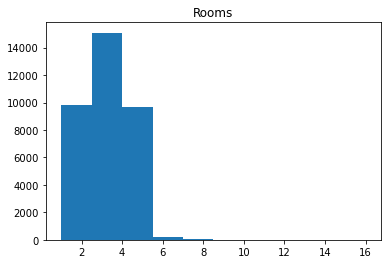

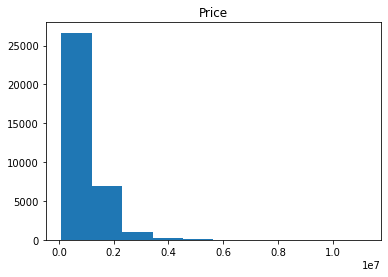

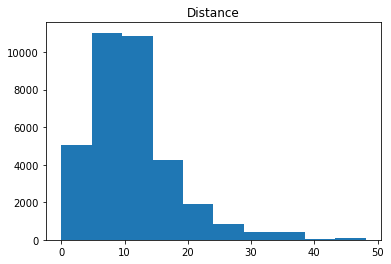

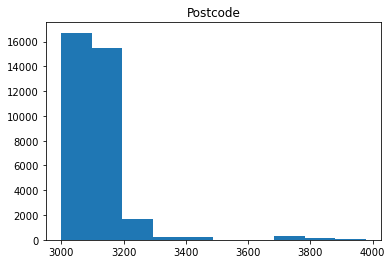

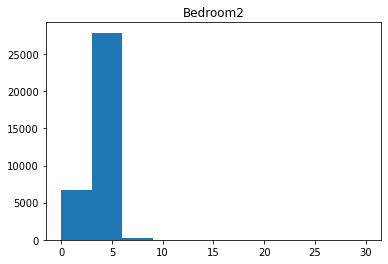

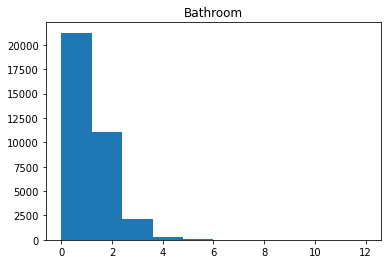

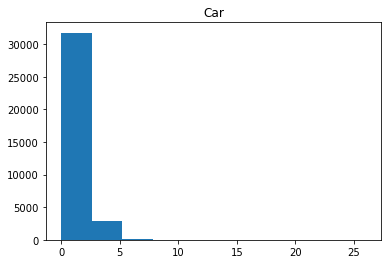

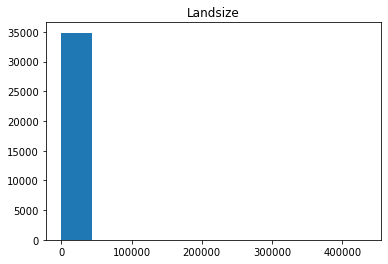

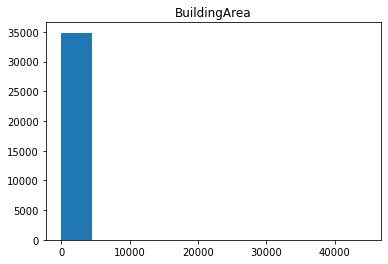

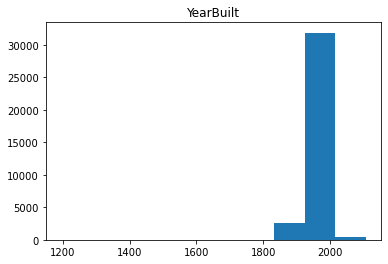

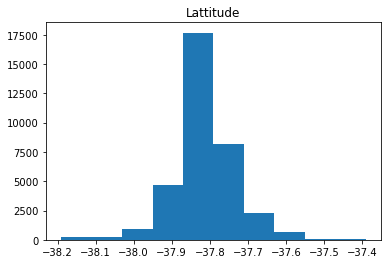

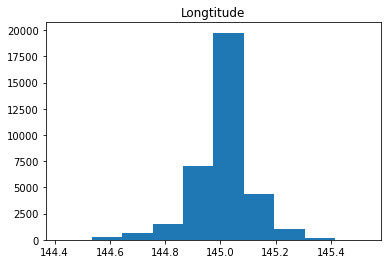

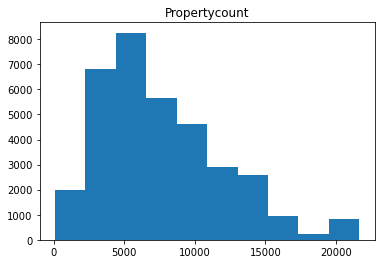

In [76]:
# Ploting Box Plot for each numerical columns
import matplotlib.pyplot as plt
%matplotlib inline
for i in cleaned_Data_R_B_BA_LS.select_dtypes(exclude=['object','datetime64[ns]']):
    plt.hist(num_col[i])
    plt.title(i)
    plt.show()

# Feature Engineering

In [78]:
# Copying the cleaned to avoid loosing Data
cleaned_Data = cleaned_Data_R_B_BA_LS.copy()

In [79]:
cleaned_Data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000,SS,Jellis,2016-03-09,2.5,3067,2,1,1,126,120,1970,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,2,1,1,202,120,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,2,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,600000,SN,Nelson,2016-06-08,2.5,3067,3,2,2,400,220,2006,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
8,Abbotsford,53 Turner St,2,h,600000,S,Biggin,2016-06-08,2.5,3067,4,1,2,201,120,1900,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019


In [80]:
# Here, I want to add one column which will show the Age of the building,
# as Age of the building is one of the most considering factor for Price of building 
cleaned_Data['Age'] = 2020 - cleaned_Data['YearBuilt']
cleaned_Data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
0,Abbotsford,68 Studley St,2,h,600000,SS,Jellis,2016-03-09,2.5,3067,2,1,1,126,120,1970,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019,50
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,2,1,1,202,120,1970,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019,50
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,2,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,120
7,Abbotsford,16 Maugie St,4,h,600000,SN,Nelson,2016-06-08,2.5,3067,3,2,2,400,220,2006,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019,14
8,Abbotsford,53 Turner St,2,h,600000,S,Biggin,2016-06-08,2.5,3067,4,1,2,201,120,1900,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019,120


In [81]:
# The easiest approach to dealing with categorical variables is to simply remove them from the dataset. 
# But this approach will only work well if the columns did not contain useful information.
# therefore I'm gonna use Categorical columns as well for modeling, So....
# I'm going to choose those Columns which has less Cardinality.

low_Cardi_cols = [ccol for ccol in cleaned_Data.columns 
                  if cleaned_Data[ccol].nunique() < 10 
                 and cleaned_Data[ccol].dtype == 'object']
print('So I got only 3 columns which is ', low_Cardi_cols)

So I got only 3 columns which is  ['Type', 'Method', 'Regionname']


In [82]:
cols = ['Type', 'Method', 'Regionname']

In [83]:
'''
For this excersice I'll use One-hot encoding which creates new columns indicating 
the presence (or absence) of each possible value in the original data.
One-hot encoding generally does not perform well if the categorical variable takes 
on a large number of values (i.e., you generally won't use it for variables taking more than 15 different values).
'''

from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHE_Data = pd.DataFrame(OHE.fit_transform(cleaned_Data[cols]))

In [84]:
# OneHotEncoder removed index so put them back
OHE_Data.index = cleaned_Data.index

In [86]:
# Remove categorical columns
OHE_num = cleaned_Data.drop(cols, axis=1)

In [87]:
# Add OHE columns to numerical feature
OHE_Cleaned_Data = pd.concat([OHE_num, OHE_Data], axis=1)
OHE_Cleaned_Data.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Abbotsford,68 Studley St,2,600000,Jellis,2016-03-09,2.5,3067,2,1,1,126,120,1970,Yarra City Council,-37.8014,144.9958,4019,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Abbotsford,85 Turner St,2,1480000,Biggin,2016-03-12,2.5,3067,2,1,1,202,120,1970,Yarra City Council,-37.7996,144.9984,4019,50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Abbotsford,25 Bloomburg St,2,1035000,Biggin,2016-04-02,2.5,3067,2,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,4019,120,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,Abbotsford,16 Maugie St,4,600000,Nelson,2016-06-08,2.5,3067,3,2,2,400,220,2006,Yarra City Council,-37.7965,144.9965,4019,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,Abbotsford,53 Turner St,2,600000,Biggin,2016-06-08,2.5,3067,4,1,2,201,120,1900,Yarra City Council,-37.7995,144.9974,4019,120,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [90]:
# Now Its time to choose those columns which will help me to make a accurate model
Selected_Col_Data = OHE_Cleaned_Data.drop(['Suburb', 'Address', 'Price', 
                                           'SellerG', 'Date', 
                                           'Postcode', 'YearBuilt', 'CouncilArea','Lattitude', 'Longtitude', 'Propertycount'],
                                          axis=1)

In [92]:
print('Shape of the Data is ', Selected_Col_Data.shape)
Selected_Col_Data.head()

Shape of the Data is  (19567, 28)


,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,2.5,2,1,1,126,120,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2.5,2,1,1,202,120,50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,2.5,2,1,0,156,79,120,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,4,2.5,3,2,2,400,220,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,2,2.5,4,1,2,201,120,120,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Now I'm ready to use this Data for Modeling

# Modeling

In [94]:
# Splitting data into Train and Test data
from sklearn.model_selection import train_test_split

X = Selected_Col_Data.copy()
y = OHE_Cleaned_Data.Price
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [95]:
print('training data and validating data has shape of ', X.shape, "and", y.shape, 'respectively')

training data and validating data has shape of  (19567, 28) and (19567,) respectively


# Using Extreme Gradient Boosting

In [ ]:
# Imporrting Gradient Boosting (Regressor)
from xgboost import XGBRegressor

# Defining Regressor
my_model = XGBRegressor(n_estimators=500,
                        learning_rate=0.05,
                        n_jobs=2)
# Fitting Model
my_model.fit(X_train, y_train, early_stopping_rounds=5,
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

In [101]:
# Predicting and Validating  Model
from sklearn.metrics import mean_absolute_error
my_preds = my_model.predict(X_valid)
print('Mean Absolute Value for this Prediction is ', mean_absolute_error(y_valid, my_preds))

NameError: name 'my_model' is not defined

In [98]:
# Setting Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [100]:
# Cross Validation
from sklearn.model_selection import cross_val_score
 
score = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print('Mean Absolute Score for this Prediction is ', score)
print(score.mean())

Mean Absolute Score for this Prediction is  [359160.32754313 284494.58608585 255502.33670743 266118.96672597
 276680.04231706]
288391.251875889
